# OCV curves

## LiCoO$_2$ OCV curve vs Li/Li$^+$

Reference  
[In situ NMR observation of the lithium extraction/insertion from LiCoO2 cathode, Electrochimica Acta 108 (2013) 343–349](https://repository.kulib.kyoto-u.ac.jp/dspace/bitstream/2433/179277/1/j.electacta.2013.06.120.pdf)

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_formats = {'png', 'retina'}
pd.set_option("display.max_rows", 10)

In [5]:
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

In [3]:
def DOD_norm(df, dod_s, dod_e):
    df = df - np.min(df)
    b = (dod_e - dod_s)/np.max(df)
    df = df*b
    df = df + dod_s
    return df

In [10]:
def dQdV(df_x, df_y, delta):
    dQ = abs(np.roll(df_x, delta) - np.roll(df_x, -delta))
    dV = abs(np.roll(df_y, delta) - np.roll(df_y, -delta))
    dQ = np.where(dQ <=0, np.nan, dQ)
    df_dQdV = dV/dQ
    df_dQdV[:delta] = np.nan
    df_dQdV[-delta:] = np.nan
    return df_dQdV

In [4]:
def smooth(df, delta):
    df_tmp = np.zeros((2*delta, len(df)))
    for i in range(delta):
        df_tmp[(i-1),:] = np.roll(df, i)
        df_tmp[(i-1+delta),:] = np.roll(df, -i)
    df_tmp2 = np.median(df_tmp, axis=0)
    df_tmp2[:delta] = np.nan
    df_tmp2[-delta:] = np.nan
    
    return df_tmp2

In [6]:
df_LCO_OCV = pd.read_csv('CathodeOCV/LCO_OCV1.csv')
df_LCO_OCV.columns = ['x', 'Potential(V)']
df_LCO_OCV = df_LCO_OCV.sort_values(by=['x'], ascending=False)
df_LCO_OCV = df_LCO_OCV.reset_index(drop=True)
df_LCO_OCV['x'] = 1-df_LCO_OCV['x']

df_LCO_OCV['x'] = smooth(df_LCO_OCV['x'],20)
df_LCO_OCV['Potential(V)'] = smooth(df_LCO_OCV['Potential(V)'], 20)
df_LCO_OCV = df_LCO_OCV.dropna()
df_LCO_OCV = df_LCO_OCV.sort_values(by=['x'], ascending=True)
df_LCO_OCV

,x,Potential(V)
20,0.0079,5.00054
21,0.0084,5.00054
22,0.0084,5.00054
23,0.0089,5.00054
24,0.0094,5.00054
...,...,...
3349,1.0000,3.79404
3350,1.0000,3.79738
3351,1.0000,3.79738
3341,1.0000,3.79571


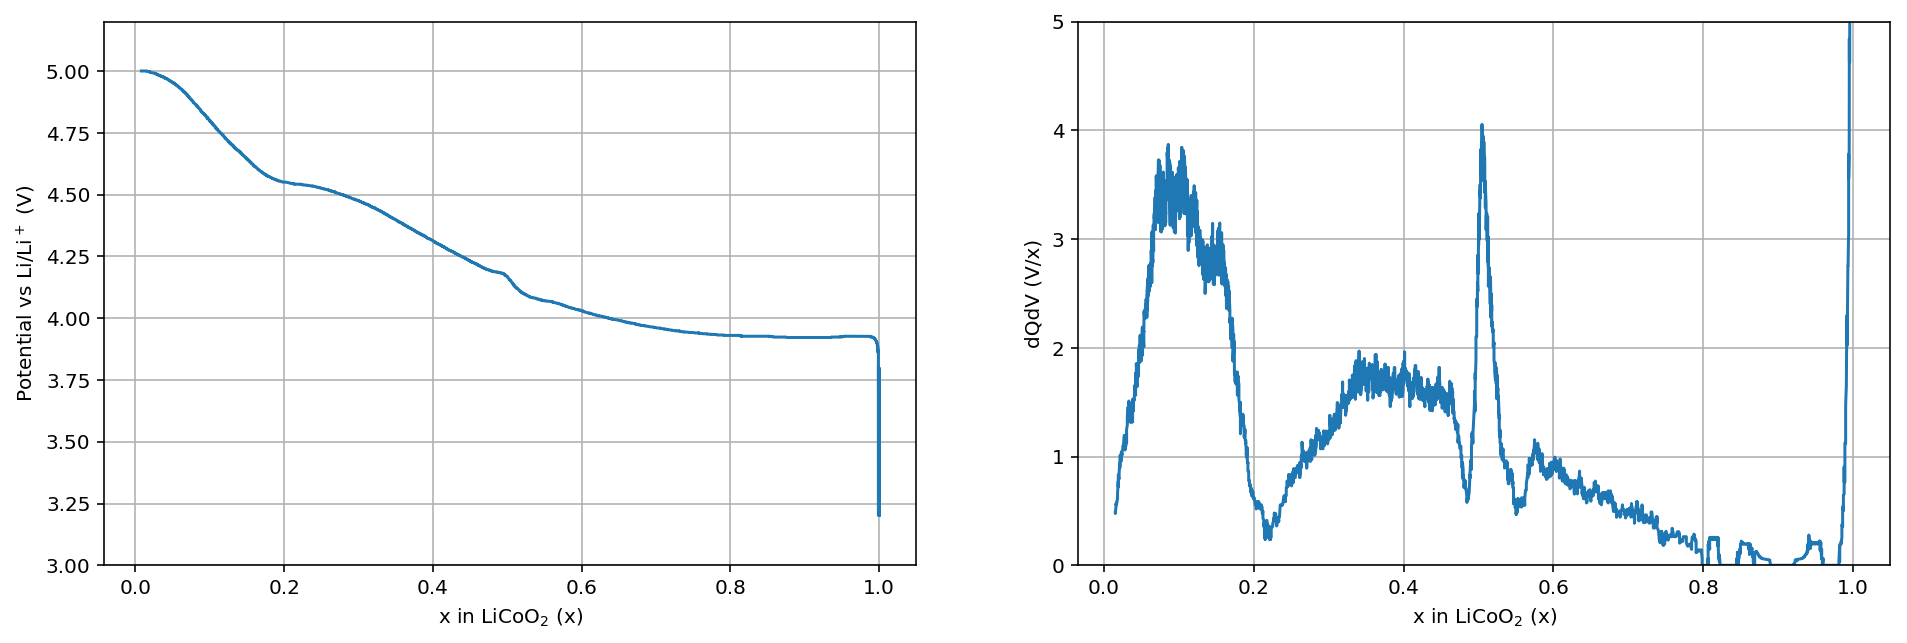

In [25]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16, 5))

ax1.plot(df_LCO_OCV['x'], df_LCO_OCV['Potential(V)'], color = new_colors[0])
ax1.set_ylim([3, 5.2])
ax1.set_ylabel('Potential vs Li/Li$^+$ (V)')
ax1.set_xlabel('x in LiCoO$_2$ (x)')
ax1.grid()

ax2.plot(df_LCO_OCV['x'], dQdV(df_LCO_OCV['x'], df_LCO_OCV['Potential(V)'], delta=20), color = new_colors[0])
ax2.set_ylim([0, 5])
ax2.set_ylabel('dQdV (V/x)')
ax2.set_xlabel('x in LiCoO$_2$ (x)')
ax2.grid()
plt.show()

## LiC$_6$ OCV curve vs Li/Li$^+$
Reference  
[Model of Lithium Intercalation into Graphite by Potentiometric Analysis with Equilibrium and Entropy Change Curves of Graphite Electrode David Allart et al., 65(2):A380-A387 · January 2018](https://www.researchgate.net/publication/322889886_Model_of_Lithium_Intercalation_into_Graphite_by_Potentiometric_Analysis_with_Equilibrium_and_Entropy_Change_Curves_of_Graphite_Electrode)

In [20]:
df_LiC6_OCV = pd.read_csv('AnodeOCV/LiC6_OCV1.csv')
df_LiC6_OCV.columns = ['x', 'Potential(V)']
df_LiC6_OCV = df_LiC6_OCV.sort_values(by=['x'], ascending=False)
df_LiC6_OCV = df_LiC6_OCV.reset_index(drop=True)
df_LiC6_OCV['x'] = 1-df_LiC6_OCV['x']
df_LiC6_OCV['x'] = smooth(df_LiC6_OCV['x'],10)
df_LiC6_OCV['Potential(V)'] = smooth(df_LiC6_OCV['Potential(V)'], 10)
df_LiC6_OCV = df_LiC6_OCV.dropna()
df_LiC6_OCV = df_LiC6_OCV.sort_values(by=['x'], ascending=True)
df_LiC6_OCV

,x,Potential(V)
10,0.166425,0.025321
11,0.167118,0.026563
12,0.167362,0.027185
13,0.167486,0.027806
14,0.167490,0.027961
...,...,...
2277,0.938254,0.523883
2278,0.938257,0.522640
2279,0.938260,0.521398
2280,0.938264,0.520155


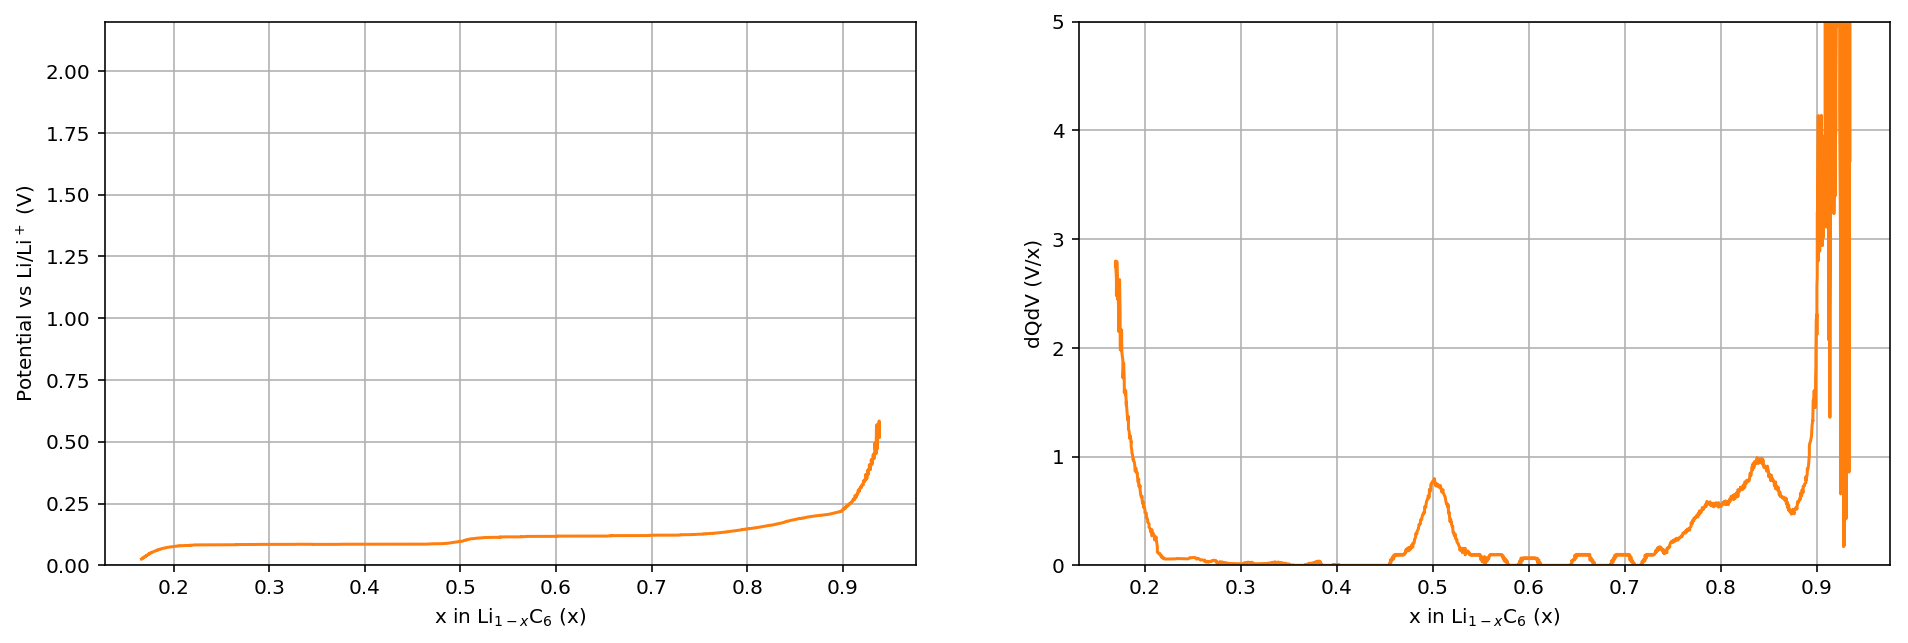

In [27]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16, 5))

ax1.plot(df_LiC6_OCV['x'], df_LiC6_OCV['Potential(V)'], color = new_colors[1])
ax1.set_ylim([0, 2.2])
ax1.set_ylabel('Potential vs Li/Li$^+$ (V)')
ax1.set_xlabel('x in Li$_{1-x}$C$_6$ (x)')
ax1.grid()

ax2.plot(df_LiC6_OCV['x'], dQdV(df_LiC6_OCV['x'], df_LiC6_OCV['Potential(V)'], delta=20), color = new_colors[1])
ax2.set_ylim([0, 5])
ax2.set_ylabel('dQdV (V/x)')
ax2.set_xlabel('x in Li$_{1-x}$C$_6$ (x)')
ax2.grid()
plt.show()